# K Nearest Neighbors - Atividade 03

Bem-vindo ao Projeto de KNN! Este será um projeto simples e muito parecido com o notebook, com a diferença de que você receberá outro conjunto de dados. Vá em frente e siga as instruções abaixo.
## Importar bibliotecas
** Importe pandas, seaborn e as bibliotecas usuais. **

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive



## Obtenha os dados
** Leia o arquivo csv 'KNN_Project_Data' em um DataFrame **

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
df = pd.read_csv('/content/gdrive/MyDrive/KNN_Project_Data')


** Verifique o cabeçalho do DataFrame.**

In [7]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# Divisão treino-teste

** Use o método train_test_split para dividir seus dados em um conjunto treino e teste.**

In [9]:
from sklearn.model_selection import train_test_split

y=df['TARGET CLASS']
X=df.drop('TARGET CLASS', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Padronize as variáveis

Hora de para padronizar as variáveis.

** Import StandardScaler do Scikit-learn. **

In [10]:
from sklearn.preprocessing import StandardScaler  

** Crie um objeto StandardScaler() chamado scaler. **

In [11]:
scaler = StandardScaler() 

** Use o método fit() do objeto para treinar o modelo. **

In [16]:
scaler.fit(X_train)

StandardScaler()

** Use o método .transform () para transformar os parâmetros em uma versão padronizada. **

In [34]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled 

array([[-1.59400988,  0.58454137, -0.68058942, ...,  0.58346735,
         0.35207259,  1.6516364 ],
       [-1.47887519,  0.11145479, -1.48706853, ...,  0.76834149,
         1.2481234 , -0.78633262],
       [ 0.01834778,  1.83244776, -0.34096819, ...,  0.27277325,
         0.089718  , -2.20329866],
       ...,
       [ 1.58802857, -1.05380619,  0.84693112, ..., -1.33683878,
         0.65809669, -0.46964813],
       [ 1.20680636, -0.03280655, -0.22183643, ..., -1.23771182,
         1.00392246, -0.09128655],
       [ 0.75077851, -1.59619713,  1.26485728, ..., -1.26656409,
         0.11033658, -0.81958051]])

** Converta os parâmetros padronizados em um DataFrame e verifique o cabeçalho desse DataFrame para garantir que a transform() funcionou. **

In [35]:
df_train = pd.DataFrame(X_train_scaled , columns=X_train.columns)
df_train

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,-1.594010,0.584541,-0.680589,0.885079,-0.331101,0.287269,-1.326559,0.583467,0.352073,1.651636
1,-1.478875,0.111455,-1.487069,0.478673,0.632534,-0.067932,1.287428,0.768341,1.248123,-0.786333
2,0.018348,1.832448,-0.340968,0.687772,1.152013,-0.923793,-0.521554,0.272773,0.089718,-2.203299
3,0.534513,0.331759,0.633546,0.190957,1.626781,0.501702,-0.078628,1.048279,-1.532975,-1.883207
4,-0.737274,-0.244397,0.577852,1.081180,0.667223,1.370688,-0.757630,0.664345,-0.087544,-1.752222
...,...,...,...,...,...,...,...,...,...,...
695,0.698597,0.230757,0.465168,0.009394,0.820058,-1.887254,0.617343,-1.490966,-1.313044,0.326124
696,-1.495084,1.693875,1.386967,-1.202431,0.509410,-1.533763,-1.060346,1.244905,-0.605917,1.155451
697,1.588029,-1.053806,0.846931,-1.112566,1.552651,-0.459807,0.193243,-1.336839,0.658097,-0.469648
698,1.206806,-0.032807,-0.221836,0.098120,2.303644,0.050384,-0.323806,-1.237712,1.003922,-0.091287


In [36]:
X_test_scaled  = scaler.transform(X_test)
X_test_scaled

array([[ 1.24595841, -0.53353132, -2.10979258, ...,  1.50318109,
         0.56130133,  0.66037602],
       [ 0.38746701,  2.09663864,  0.51508484, ...,  0.61323003,
        -0.84914725,  1.52265811],
       [ 0.05416926, -0.93094538, -0.07638489, ..., -1.95476417,
        -0.88092582,  0.55135021],
       ...,
       [-0.71270969,  0.35876796,  2.2216287 , ...,  1.03651515,
        -0.35656557,  0.92462163],
       [ 0.32191861,  0.47140894, -1.70765909, ..., -1.21332703,
        -0.39812662,  1.49745195],
       [-0.32295738,  0.95225569, -1.27049849, ...,  0.82027787,
        -1.33660338,  0.83761655]])

In [37]:
df_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)
df_test

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.245958,-0.533531,-2.109793,-0.394756,0.612209,0.779940,0.734461,1.503181,0.561301,0.660376
1,0.387467,2.096639,0.515085,0.962841,0.266777,0.786714,0.600269,0.613230,-0.849147,1.522658
2,0.054169,-0.930945,-0.076385,-0.300484,0.022495,0.173836,0.708678,-1.954764,-0.880926,0.551350
3,0.099469,0.370616,0.013639,1.285975,0.505925,-2.511568,-0.046950,-0.880984,-0.427318,0.115852
4,0.755077,1.290745,-1.477597,-1.119858,-0.299477,0.790359,1.093245,0.677336,-0.383671,1.874653
...,...,...,...,...,...,...,...,...,...,...
295,-0.914398,0.053928,-1.456007,0.318040,1.596392,-0.439588,-1.292019,0.968242,-0.970524,0.308762
296,0.922785,0.392865,0.726629,0.255583,-0.429132,-0.532108,0.681322,1.350254,-2.412200,1.207825
297,-0.712710,0.358768,2.221629,1.245105,-0.129367,0.321127,-0.934224,1.036515,-0.356566,0.924622
298,0.321919,0.471409,-1.707659,-0.393802,0.479668,-1.036619,-0.452789,-1.213327,-0.398127,1.497452


# Usando o KNN

** Importe o KNeighborClassifier do scikit learn. **

In [32]:
from sklearn.neighbors import KNeighborsClassifier

** Crie uma instância do modelo KNN com n_neighbors = 1 **

In [33]:
knn = KNeighborsClassifier(n_neighbors=1)

** Ajuste este modelo KNN aos dados de treinamento. **

In [38]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [39]:
y_train_pred = knn.predict(X_test_scaled)

In [42]:
knn.score(X_test_scaled, y_test)

0.7233333333333334

# Escolhendo o valor K
Vamos continuar usando o método do cotovelo para escolher um bom valor K!

** Crie um loop for que treine vários modelos KNN com valores k diferentes e, em seguida, mantenha um registro do error_rate para cada um desses modelos com uma lista. Consulte o notebook se você estiver confuso nesta etapa. **

** Agora crie o seguinte gráfico usando as informações do seu loop. **

Text(0, 0.5, 'Error Rate')

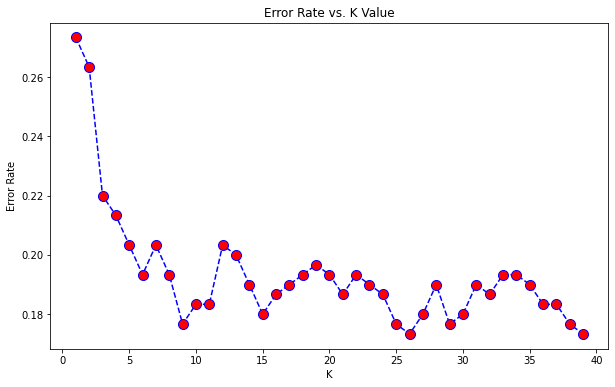

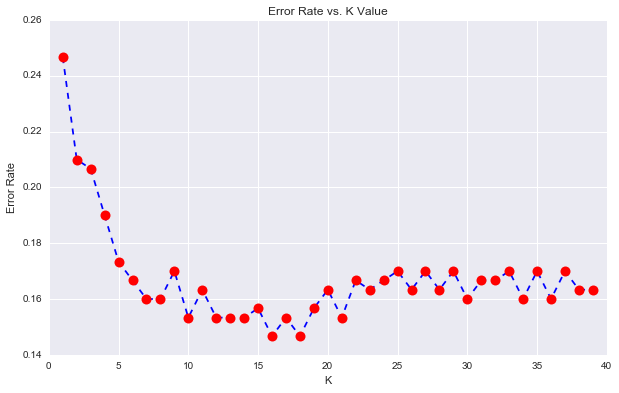

## Treine seu modelo novamente com novo valor K

** Treine novamente seu modelo com o melhor valor K (até você para decidir o que deseja) e re-faça o relatório de classificação e a matriz de confusão. **

WITH K=9


[[120  27]
 [ 26 127]]


              precision    recall  f1-score   support

           0       0.82      0.82      0.82       147
           1       0.82      0.83      0.83       153

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



WITH K=26


[[121  26]
 [ 26 127]]


              precision    recall  f1-score   support

           0       0.82      0.82      0.82       147
           1       0.83      0.83      0.83       153

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

